In [3]:
import random
import numpy as np
from scipy.io  import loadmat
import math
import matplotlib.pyplot as plt

In [4]:
def bec(b,p):
  a = b.copy()
  for i in range(0,len(a)):
    if random.random() <= p:
      a[i] = -1
  return a

def rat(i):
  if i==1:
    i = 0.999999999
  if i==0:
    i = 0.000000001
  return i/(1-i)
  
def c2v(aa,ii):  
  aa = np.delete(aa,ii) 
  length = len(aa)
  sum = 1
  for i in range(length):
    sum = sum * ( 1 - 2 * aa[i])
  sum = 0.5 - (sum / 2)
  return sum

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
5 3
3000
5000
ch =  [[  39   46   83  138  177]
 [   0   47   84  139  178]
 [   1   48   85  140  179]
 ...
 [ 977 1966 2988 3975 4969]
 [ 978 1967 2989 3976 4970]
 [ 979 1968 2990 3977 4971]]
var =  [[   1 1014 2025]
 [   2 1015 2026]
 [   3 1016 2027]
 ...
 [ 994 1962 2985]
 [ 995 1963 2986]
 [ 996 1964 2987]]


In [7]:
def success(H,C):
  #print(H)
  dc = dv = 0

  for a in H[0]:
    if a==1:
      dc = dc + 1

  for na in H[:,0]:
    if na==1:
      dv = dv+1

  #print(dc,dv)
  #  ↑ calculating dc and dv

  row = H.shape[0]
  print(row)
  col = H.shape[1]
  print(col)
  #  ↑ calculating no. of CNs and VNs

  ch = np.array([[-1 for i in range(dc)] for j in range(row)])
  var = np.array([[-1 for i in range(dv)] for j in range(col)])

  for i in range(0,row):
    k = 0
    for j in range(0,col):
      if H[i][j] == 1:
        ch[i][k] = j;
        k = k+1
        for m in range(dv):
          if var[j][m] == -1:
            var[j][m] = i
            break
  #  ↑ implementing tanner graph model
  #print('check = ',ch)
  #print('variable = ',var)

  p=0
  Ns = 500               # N-sim variable
  ee = np.zeros(11)     # probabilities 0 to 1
  for gg in range(0,11):
    p = round(p,1)
    #print('p  =  ',p)
    s = 0

    for ns in range(0,Ns):    # simulating     
      
      AC = bec(C,p)           # channel output
      #print('AC= ',AC)

      acp=np.zeros((col))         
      for i in range(0,col):
        if AC[i]==1:
          acp[i] = 1
        elif AC[i]==0:
          acp[i] = 0
        else:
          acp[i] = 0.5
  # ↑ assigning probabilities according to bits
      #print('acp = ')
      #print(acp)
      # ↑ VNs got initial data.

      cs = np.zeros((row,dc))

      for i in range(0,row):
        for j in range(0,dc):
          cs[i][j] = acp[ch[i][j]]
  #    print('cs = ')
  #    print(cs)
      # ↑ CNs got initial data.

      ansp = np.array([-1]*col)
      for u in range(0,50):   #loop for each iteration

        cc = np.zeros((row,dc)) 
        for i in range(0,row):
          for j in range(0,dc):
            cc[i][j] = c2v(cs[i],j)
  #     print('cc = ')
  #     print(cc)
# ↑ CNs computed to send VNs back.

        vs = np.zeros((col,dv))
        for i in range(0,col):
          for j in range(0,dv):
            ii = var[i][j]
            for k in range(0,dc):
              if ch[ii][k] == i:
                break
            vs[i][j] = cc[ii][k]
  #     print('vs = ')
  #     print(vs)
        # ↑ VN got computed data.

        ans=np.zeros((col))
        for i in range(0,col):    #darek VN mate.
            ans[i] = math.log(rat(acp[i]),math.e)
            for j in range(0,dv):    #darek CN mate
              ans[i] = ans[i] + math.log(rat(vs[i][j]),math.e)
            if ans[i]>=0:
              ans[i] = 1
            else:
              ans[i] = 0
        #print('ans = ',ans)
    # determining answer bits.

        if (ans == ansp).all():
          break
        ansp = ans

        vc = np.zeros((col,dv))
        for i in range(0,col):
          for j in range(0,dv):
            up = acp[i]
            dw = 1-acp[i]
            for k in range(0,dv):
              if var[i][k] == var[i][j]:
                continue
              else:
                up = up * vs[i][k]
                dw = dw * (1-vs[i][k])
            vc[i][j] = up/(up+dw)

  #      print('vc = ')
  #      print(vc)
# ↑ VN computing to send CNs back.

        for i in range(0,row):
          for j in range(0,dc):
            ii = ch[i][j]
            for k in range(0,dv):
              if var[ii][k] == i:
                break
            cs[i][j] = vc[ii][k]
  #      print('cs = ',cs)
        # CN gets computed data for next iteration.

      if np.array_equal(ans,C):
        s = s + 1       # success probabilities for graph
   
    ee[gg] = s
    p = p + 0.1
      #print(jj)
  print('ee = ',ee)
  ee = ee/Ns
  tri = np.zeros(11)
  for i in range (0,11):
    tri[i] = i / 10 
  plt.title("3000 X 5000 H_mat, dc = 5, dv = 3, Soft BEC ")   #plotting convergence graph.
  plt.xlabel("p error probability")
  plt.ylabel("probability of successful decoding")
  plt.grid()
  plt.plot(tri,ee,linewidth = '2.5')

9
12
ee =  [500. 497. 481. 434. 378. 287. 172.  82.  15.   1.   0.]


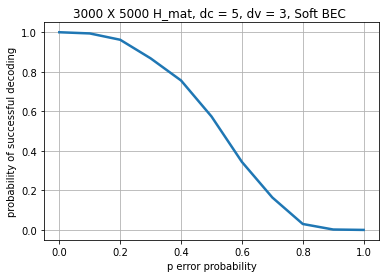

In [8]:
'''
aa = loadmat('/content/Hmatrix2.mat')
result = aa.items()
data = list(result)
HH = np.array(data)
print(HH.shape)
H = HH[3][1]
'''
H = np.array([[1,0,0,0,0,1,0,1,0,1,0,0],
              [1,0,0,1,1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,1,0,1,0,0,0],
              [0,0,1,0,0,1,0,0,0,0,1,1],
              [0,0,1,0,0,0,1,1,0,0,0,1],
              [0,1,0,0,1,0,0,0,1,0,1,0],
              [1,0,0,1,0,0,1,0,0,1,0,0],
              [0,1,0,0,0,1,0,1,0,1,0,0],
            [0,0,1,1,0,0,0,0,1,0,0,1]])
C = np.zeros((12))
success(H,C)